# TP 1

## Años

In [2]:
!pip install pandas
!pip install seaborn

## Imports + configuración

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("classic")
%matplotlib inline
sns.set(rc={"figure.figsize": (25, 8)})

## Leer dataset

In [4]:
df = pd.read_csv("datos_incendios.csv")

In [5]:
df.head()

año     provincia  total_incendios  incendio_neglgencia  \
0  1993  Buenos Aires                0                    0   
1  1993     Catamarca                0                    0   
2  1993         Chaco                0                    0   
3  1993        Chubut               21                   18   
4  1993       Córdoba              151                    0   

   incendio_intencional  incendio_natural  incendio_desconocida  
0                     0                 0                     0  
1                     0                 0                     0  
2                     0                 0                     0  
3                     0                 0                     3  
4                     0                 0                   151

In [6]:
df.dtypes

año                      int64
provincia               object
total_incendios          int64
incendio_neglgencia      int64
incendio_intencional     int64
incendio_natural         int64
incendio_desconocida     int64
dtype: object

## Exploración

### Provincias

In [7]:
df_agg = df.groupby(by=["provincia"]).total_incendios.sum().reset_index()
df_agg.sort_values(by=["total_incendios"], ascending=False)

provincia  total_incendios
0                      Buenos Aires            77847
16                        Río Negro            32181
21                         Santa Fe            22702
17                            Salta            17446
2                             Chaco             8860
6                           Córdoba             8797
13                         Misiones             6992
18                         San Juan             6701
7                        Entre Ríos             5230
3                            Chubut             3757
1                         Catamarca             3468
14                          Neuquén             3459
9                             Jujuy             3405
5                        Corrientes             3353
25                          Tucumán             3033
12                          Mendoza             2717
11                         La Rioja             1891
10                         La Pampa             1676
8                           Formosa             1630
23              Santiago del Estero             1516
19                         San Luis             1135
24                 Tierra del Fuego              593
20                       Santa Cruz              515
22                         Santa Fé              442
15               Parques Nacionales               83
4   Ciudad Autónoma de Buenos Aires               60

In [8]:
sorted(df.provincia.unique())

['Buenos Aires',
 'Catamarca',
 'Chaco',
 'Chubut',
 'Ciudad Autónoma de Buenos Aires',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Parques Nacionales',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santa Fé',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán']

Fix de provincia 'Santa Fé'

In [9]:
df.loc[df.provincia == "Santa Fé", "provincia"] = "Santa Fe"

## Años

In [10]:
df_agg = df.groupby(by=["año"]).total_incendios.mean().reset_index()

<AxesSubplot:xlabel='año'>

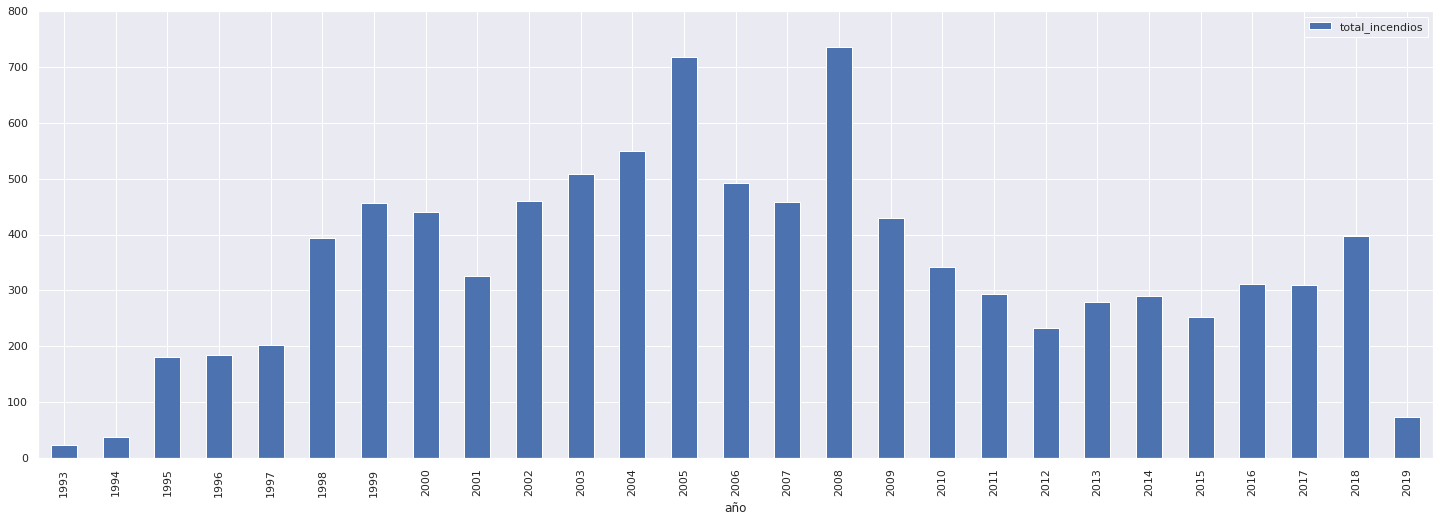

In [11]:
df_agg.plot.bar(x="año", y="total_incendios")

In [12]:
df = df[(df["año"] >= 2000) & (df["año"] <= 2018)]

## Proporcion de los incendios por incidencia 

In [13]:
df_prop = df.copy()
df_prop["incendio_intencional"] = (df["incendio_intencional"] * 100) / df[
    "total_incendios"
]
df_prop["incendio_desconocida"] = (df["incendio_desconocida"] * 100) / df[
    "total_incendios"
]
df_prop["incendio_neglgencia"] = (df["incendio_neglgencia"] * 100) / df[
    "total_incendios"
]
df_prop["incendio_natural"] = (df["incendio_natural"] * 100) / df["total_incendios"]

In [14]:
df_prop.head(5)

año                        provincia  total_incendios  \
159  2000                     Buenos Aires             3503   
160  2000                        Catamarca               15   
161  2000                            Chaco              664   
162  2000                           Chubut              104   
163  2000  Ciudad Autónoma de Buenos Aires                1   

     incendio_neglgencia  incendio_intencional  incendio_natural  \
159            25.549529              6.822723          5.366828   
160            40.000000             60.000000          0.000000   
161             6.325301             82.680723          0.301205   
162            45.192308             30.769231          0.961538   
163             0.000000            100.000000          0.000000   

     incendio_desconocida  
159             62.260919  
160              0.000000  
161             10.692771  
162             23.076923  
163              0.000000

<AxesSubplot:xlabel='año'>

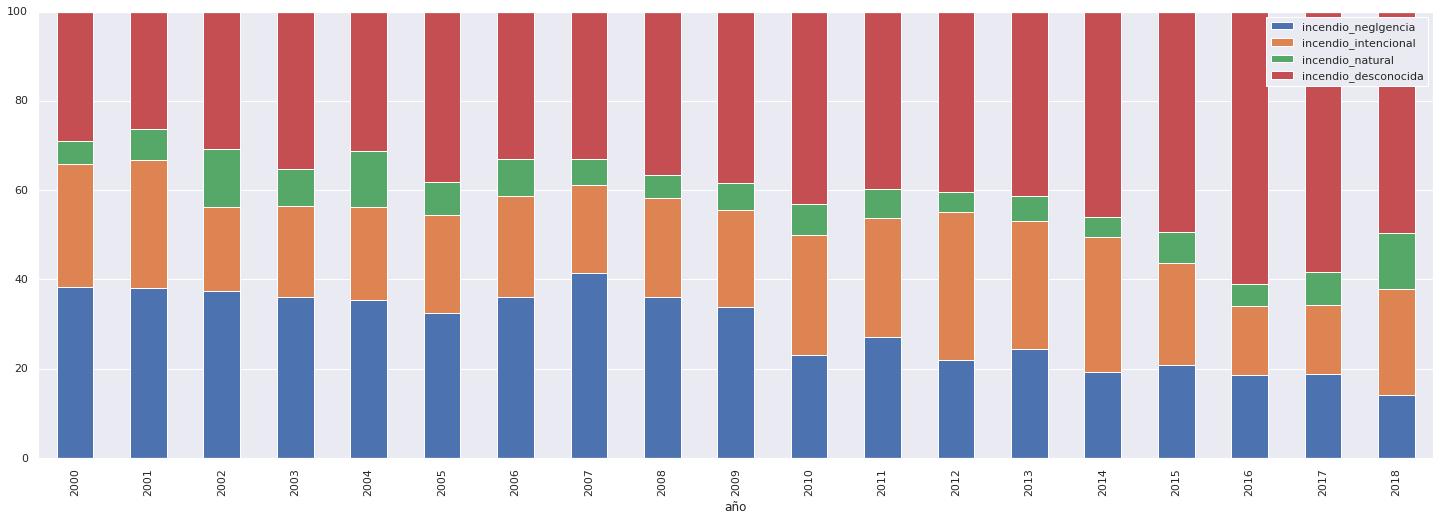

In [15]:
df_prop.loc[:, ~df.columns.isin(["provincia", "total_incendios"])].groupby(
    by=["año"]
).mean().plot(kind="bar", stacked=True)

## Gráficas

### Santa fe 

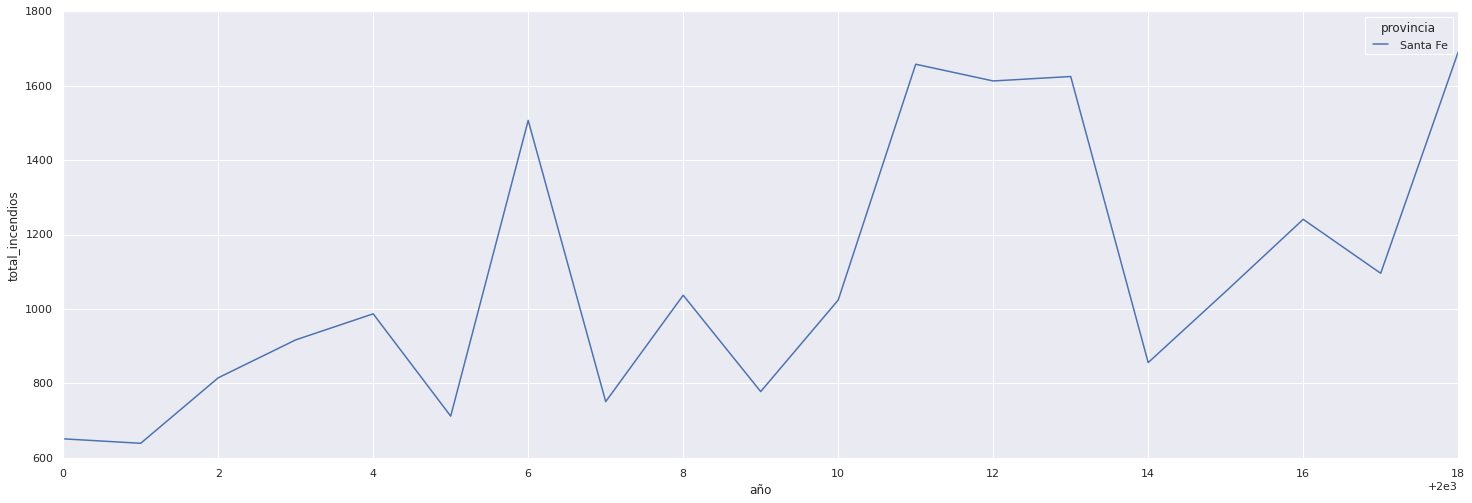

In [16]:
x = sns.lineplot(
    data=df.loc[df["provincia"] == "Santa Fe"],
    x="año",
    y="total_incendios",
    hue="provincia",
)

<AxesSubplot:xlabel='año'>

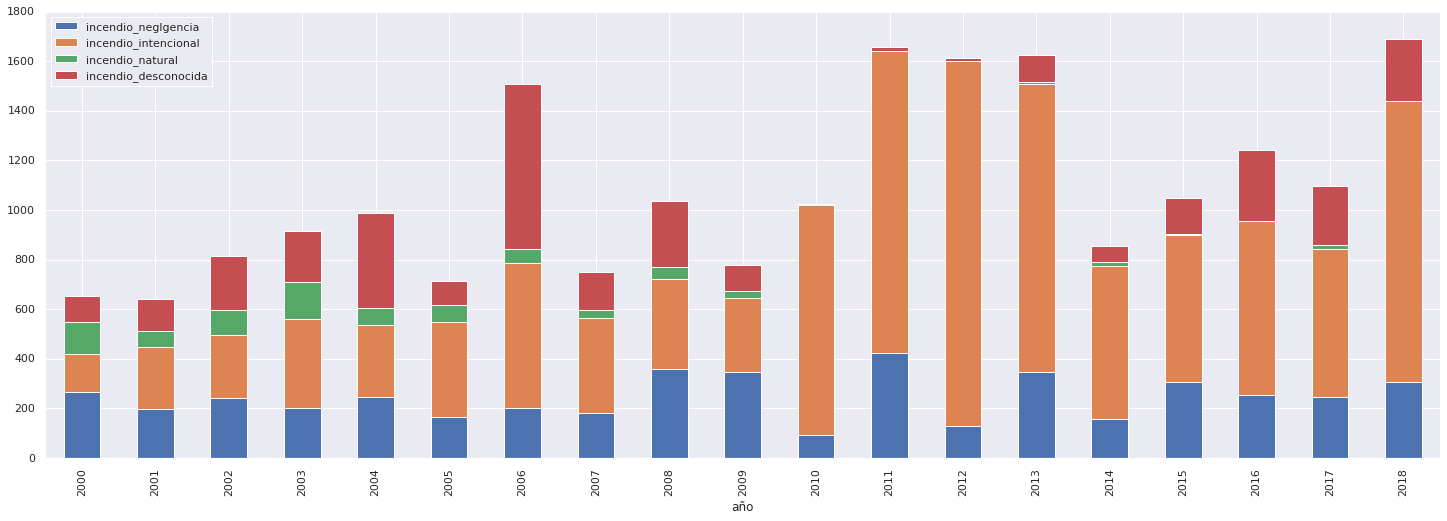

In [17]:
df_subset = df.loc[df["provincia"] == "Santa Fe", ~df.columns.isin(["total_incendios"])]
df_subset.set_index("año").plot(kind="bar", stacked=True)

Ordenar las columnas en las gráficas

In [18]:
cols = df.columns.tolist()
cols

['año',
 'provincia',
 'total_incendios',
 'incendio_neglgencia',
 'incendio_intencional',
 'incendio_natural',
 'incendio_desconocida']

In [19]:
cols = [
    "año",
    "provincia",
    "incendio_intencional",
    "incendio_desconocida",
    "incendio_neglgencia",
    "incendio_natural",
    # 'total_incendios',
]

In [20]:
df[cols]

año                        provincia  incendio_intencional  \
159  2000                     Buenos Aires                   239   
160  2000                        Catamarca                     9   
161  2000                            Chaco                   549   
162  2000                           Chubut                    32   
163  2000  Ciudad Autónoma de Buenos Aires                     1   
..    ...                              ...                   ...   
603  2018                         San Juan                   211   
604  2018                         San Luis                     0   
605  2018                         Santa Fe                  1131   
606  2018                 Tierra del Fuego                     4   
607  2018                          Tucumán                    29   

     incendio_desconocida  incendio_neglgencia  incendio_natural  
159                  2181                  895               188  
160                     0                    6                 0  
161                    71                   42                 2  
162                    24                   47                 1  
163                     0                    0                 0  
..                    ...                  ...               ...  
603                     0                  104                 0  
604                    12                    0                27  
605                   250                  308                 2  
606                     3                    9                 0  
607                     0                    0                 4  

[449 rows x 6 columns]

<AxesSubplot:xlabel='año'>

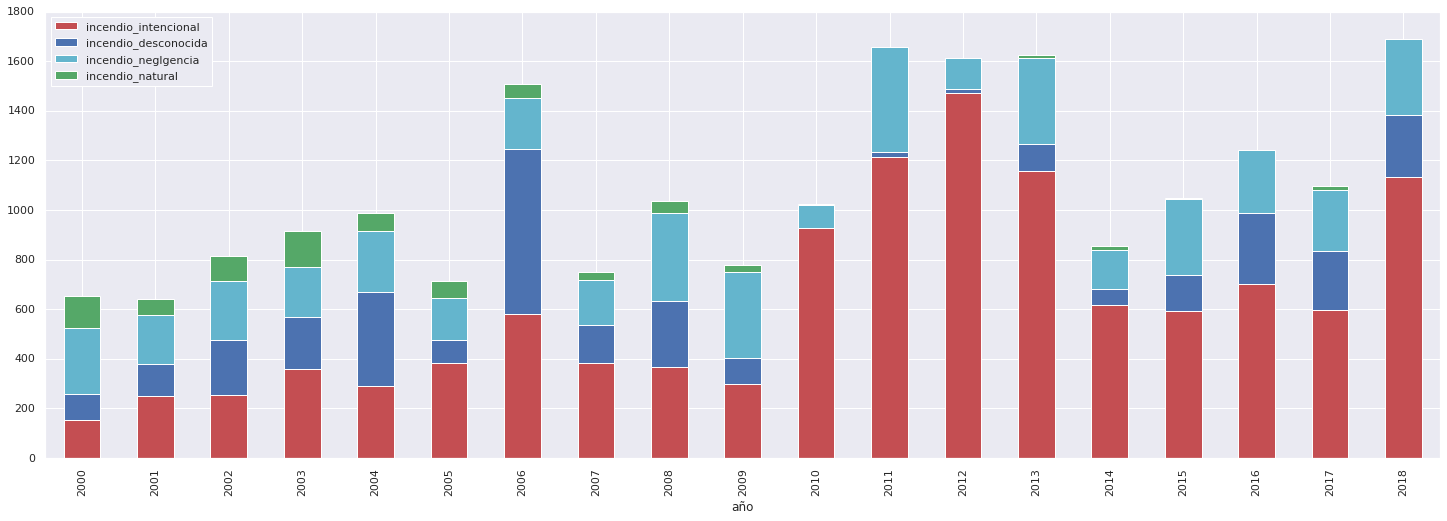

In [21]:
df_subset = df.loc[df["provincia"] == "Santa Fe", cols]
df_subset.set_index("año").plot(kind="bar", stacked=True, color=["r", "b", "c", "g"])

In [22]:
cols = [
    "año",
    "provincia",
    "incendio_intencional",
    "incendio_neglgencia",
    "incendio_desconocida",
    "incendio_natural",
    "total_incendios",
]

In [23]:
df_prop = df.loc[df["provincia"] == "Santa Fe", cols].copy()

df_prop["incendio_intencional"] = (df_prop["incendio_intencional"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_desconocida"] = (df_prop["incendio_desconocida"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_neglgencia"] = (df_prop["incendio_neglgencia"] * 100) / df_prop[
    "total_incendios"
]
df_prop["incendio_natural"] = (df_prop["incendio_natural"] * 100) / df_prop[
    "total_incendios"
]

In [24]:
df_prop

año provincia  incendio_intencional  incendio_neglgencia  \
179  2000  Santa Fe             23.655914            40.860215   
203  2001  Santa Fe             39.123631            30.829421   
226  2002  Santa Fe             31.288344            29.447853   
250  2003  Santa Fe             39.149400            21.919302   
273  2004  Santa Fe             29.381966            24.822695   
297  2005  Santa Fe             53.511236            23.455056   
320  2006  Santa Fe             38.553417            13.470471   
344  2007  Santa Fe             50.732357            24.367510   
368  2008  Santa Fe             35.197686            34.426230   
392  2009  Santa Fe             38.431877            44.473008   
415  2010  Santa Fe             90.429688             8.984375   
438  2011  Santa Fe             73.220748            25.633293   
461  2012  Santa Fe             91.258524             7.873528   
485  2013  Santa Fe             71.261538            21.415385   
509  2014  Santa Fe             72.079439            18.224299   
533  2015  Santa Fe             56.542502            29.321872   
557  2016  Santa Fe             56.567284            20.306205   
581  2017  Santa Fe             54.379562            22.536496   
605  2018  Santa Fe             66.883501            18.214075   

     incendio_desconocida  incendio_natural  total_incendios  
179             15.821813         19.662058              651  
203             20.187793          9.859155              639  
226             26.871166         12.392638              815  
250             22.791712         16.139586              917  
273             38.601824          7.193516              987  
297             13.483146          9.550562              712  
320             44.193762          3.782349             1507  
344             20.639148          4.260985              751  
368             25.650916          4.725169             1037  
392             13.496144          3.598972              778  
415              0.000000          0.585938             1024  
438              1.145959          0.000000             1658  
461              0.867948          0.000000             1613  
485              6.646154          0.676923             1625  
509              7.476636          2.219626              856  
533             13.849093          0.286533             1047  
557             23.126511          0.000000             1241  
581             21.715328          1.368613             1096  
605             14.784151          0.118273             1691

In [52]:
import matplotlib as mpl


def autolabel(bar_label):
    # print(rects)
    # for idx,rect in enumerate(rects):

    # print(rects.get_children())
    bars = [
        rect
        for rect in bar_plot.get_children()
        if isinstance(rect, mpl.patches.Rectangle)
    ]
    # print(f"len bars: {len(bars)}")

    for idx, rect in enumerate(bars):
        height = rect.get_height()
        if idx < len(bar_label) and bar_label[idx] > 5:
            # idx % 4 == 0 and i < len(bar_label) - 1 and
            # print(f"idx: {idx}, rect:{rect}, bar_label[i]: {bar_label[i]}")
            # print(f"idx: {idx}, rect:{rect}, idx: {idx}, bar_label[idx]: {bar_label[idx]}")
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + 0.5 * height,
                str(bar_label[idx]) + "%",
                fontsize="medium",
                ha="center",
                va="center",
                rotation=0,
            )

In [26]:
# bar_plot.get_children()
# len(df_prop["incendio_intencional"].astype("int64").to_list())
# len(df_prop["incendio_intencional"].astype("int64").to_list() + df_prop["incendio_neglgencia"].astype("int64").to_list())
df_prop["incendio_intencional"].astype("int64").to_list()
# df_prop["incendio_intencional"].astype("int64").to_list() + df_prop["incendio_neglgencia"].astype("int64").to_list()

[23, 39, 31, 39, 29, 53, 38, 50, 35, 38, 90, 73, 91, 71, 72, 56, 56, 54, 66]

In [27]:
df_prop = df_prop.rename(columns={
    'incendio_intencional': 'Intencional',
    'incendio_neglgencia': 'Negligencia',
    'incendio_desconocida': 'Desconocida',
    'incendio_natural': 'Natural',
})

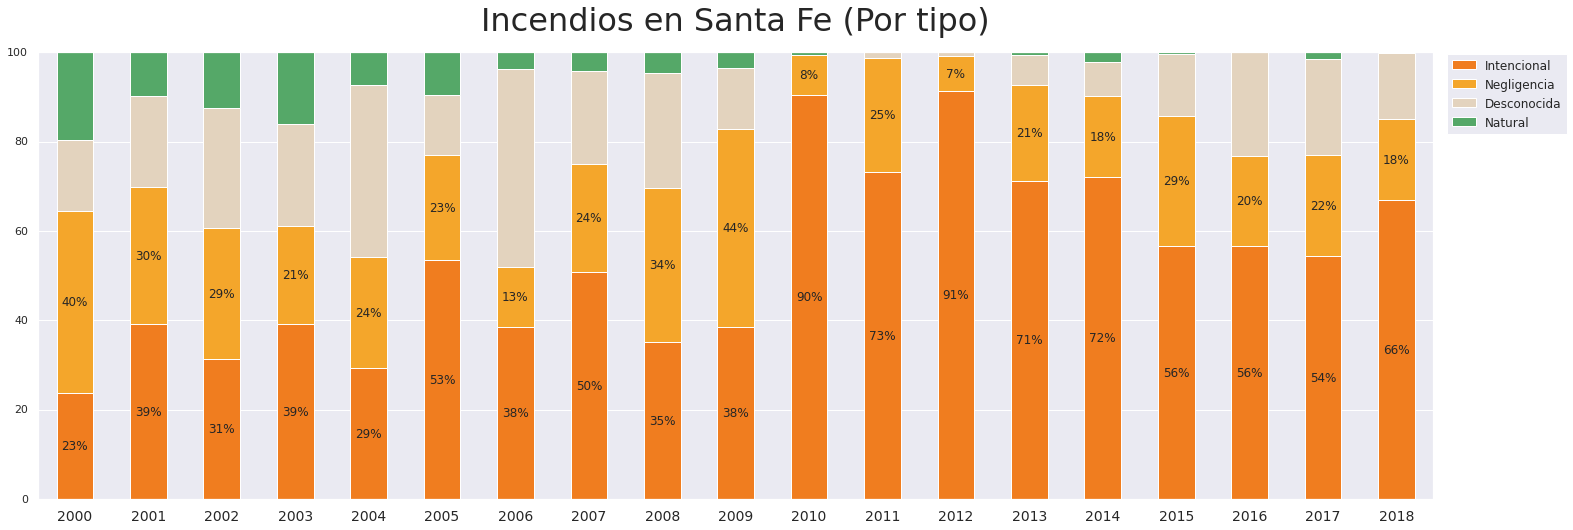

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1)

# print(ax)
bar_plot = (
    df_prop.loc[:, ~df_prop.columns.isin(["total_incendios"])]
    .set_index("año")
    .plot(kind="bar", stacked=True, color=["#f07d1f", "#f4a62b", "#e3d3be", "g"], ax=ax) # 07.sta_fe
    # .plot(kind="bar", stacked=True, color=["#ff0000", "#f4a62b", "#e3d3be", "g"], ax=ax) # 09
    # .plot(kind="bar", stacked=True, color=["#cc1b14", "#f4a62b", "#e3d3be", "g"], ax=ax) # 08
    # .plot(kind="bar", stacked=True, color=["#f07d1f", "#f4a62b", "#e3d3be", "g"], ax=ax) # 07.sta_fe
    # .plot(kind="bar", stacked=True, color=["#fb8827", "#f4a62b", "#e3d3be", "g"], ax=ax) # 06.sta_fe # https://icolorpalette.com/imagepalette/fire_wildfire_forest
    # .plot(kind="bar", stacked=True, color=["#bc5008", "#fbc40a", "#7a4a17", "g"], ax=ax) # 05_sta_fe
    # https://icolorpalette.com/palette-by-themes/fire
    # .plot(kind="bar", stacked=True, color=["#b44911", "#b85e30", "#f6a93c", "#fad450"], ax=ax) # Tiene toda la pinta de que es está
    # .plot(kind="bar", stacked=True, color=["#cc1b14", "#ff9a00", "#6d4f36", "g"], ax=ax)
    # .plot(kind="bar", stacked=True, color=["#ff0000", "#ff9a00", "#1d0416", "g"], ax=ax)
    # .plot(kind="bar", stacked=True, color=["r", "b", "c", "g"], ax=ax)
)
# df_prop.loc[:, ~df_prop.columns.isin(["total_incendios"])].set_index("año").plot(
#     kind="bar", stacked=True, color=["r", "b", "c", "g"]
# )

autolabel(
    bar_label=df_prop["Intencional"].astype("int64").to_list()
    + df_prop["Negligencia"].astype("int64").to_list()
)

# Add Title and Labels
plt.title("Incendios en Santa Fe (Por tipo)", fontsize=32, pad=22)
plt.xticks(fontsize=14, rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1.0, 0.08, 0.01), loc="upper right", fontsize=12)

# plt.legend(loc='lower right')
# plt.legend(loc='best')

plt.xlabel("", fontsize=20, labelpad=20)
# plt.xlabel("Año", fontsize=20, labelpad=20)
# plt.ylabel("Porcentaje", fontsize=20)
plt.show()

Listo:
* Ajustar nombres de columnas
* Revisar titulos en general
* año como xlabel está demás?
* % en texto en la barra?

TODO: 
- check de colores (Mejor poner otros?)
- texto barra ver estilo